## Working with the DataBase: VENPAYBI

### The Table CoffeeCappTransByPlatformInstantKpis

In [11]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

First establish connection to the database using python

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [14]:
query = """
        SELECT PlatformName, SUM(TotalTransactionsCounter) AS TotalTrans1,
        SUM(CompletedTransactionsCounter) AS TotalTrans2,
        SUM(ValidationErrorsCounter) AS TotalValErrors,
        SUM(ConnectionErrorsCounter) AS TotalConnecErrors,
        SUM(RejectionErrorsCounter) AS TotalRejectErrors
        FROM CoffeeCappTransByPlatformInstantKpis
        GROUP BY PlatformName
"""

df_coffee4 = pd.read_sql(query, engine)
df_coffee4

,PlatformName,TotalTrans1,TotalTrans2,TotalValErrors,TotalConnecErrors,TotalRejectErrors
0,MobilePayStage,26383,0,1305,24904,174
1,BiTX-OD,15386038,13588685,453680,721904,616894
2,MobilePayFrance,0,0,0,0,0
3,Coges,5490989,4273838,193196,272289,749250
4,MobilePaySpain,0,0,0,0,0
5,MobilePay,30686080,23443326,1530313,4554660,1147335
6,MobilePay-CPI,5289811,4225882,198710,790826,72731
7,Pickio,1220,678,76,2,464


In [15]:
df_coffee4.describe()

,TotalTrans1,TotalTrans2,TotalValErrors,TotalConnecErrors,TotalRejectErrors
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,7.110065e+06,5.691551e+06,2.971600e+05,7.955731e+05,3.233560e+05
std,1.090266e+07,8.545806e+06,5.234587e+05,1.553923e+06,4.515258e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.150000e+02,0.000000e+00,5.700000e+01,1.500000e+00,1.305000e+02
50%,2.658097e+06,2.113280e+06,9.725050e+04,1.485965e+05,3.659750e+04
75%,7.964751e+06,6.602550e+06,2.624525e+05,7.391345e+05,6.499830e+05
max,3.068608e+07,2.344333e+07,1.530313e+06,4.554660e+06,1.147335e+06


<Axes: xlabel='PlatformName'>

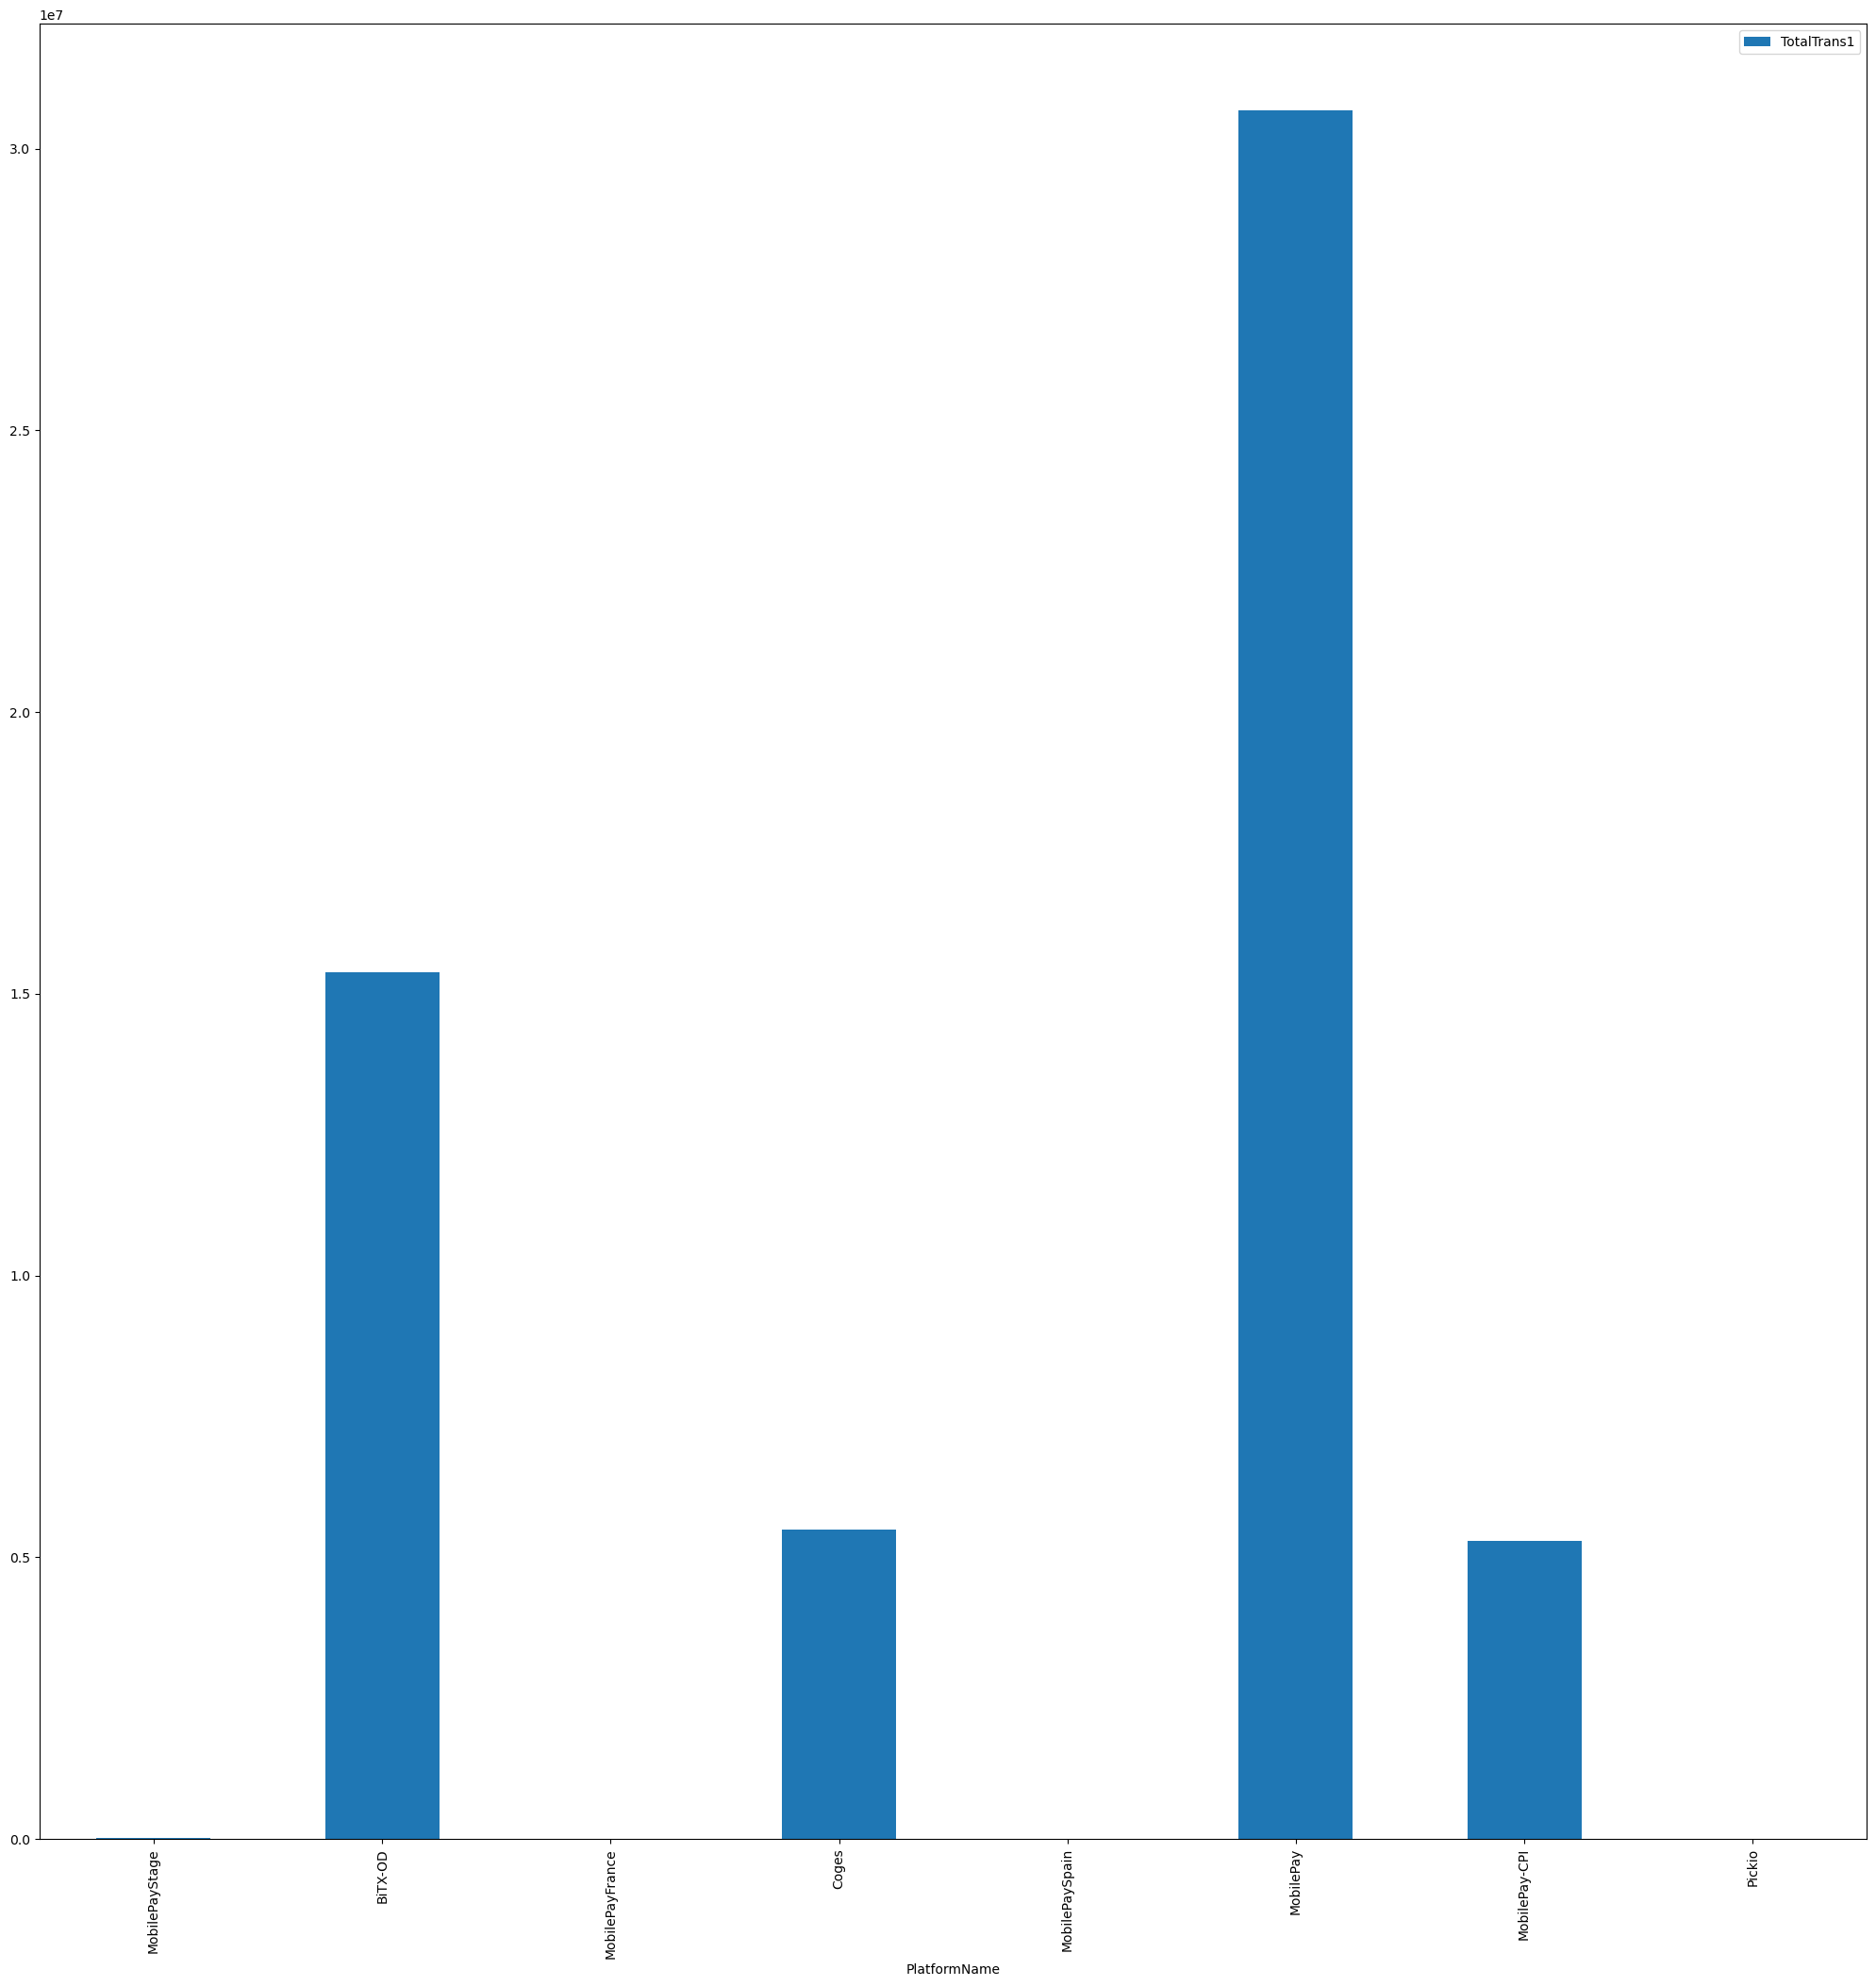

In [16]:
df_coffee4.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalTrans1",
  figsize=(25, 25)
  )

<Axes: xlabel='PlatformName'>

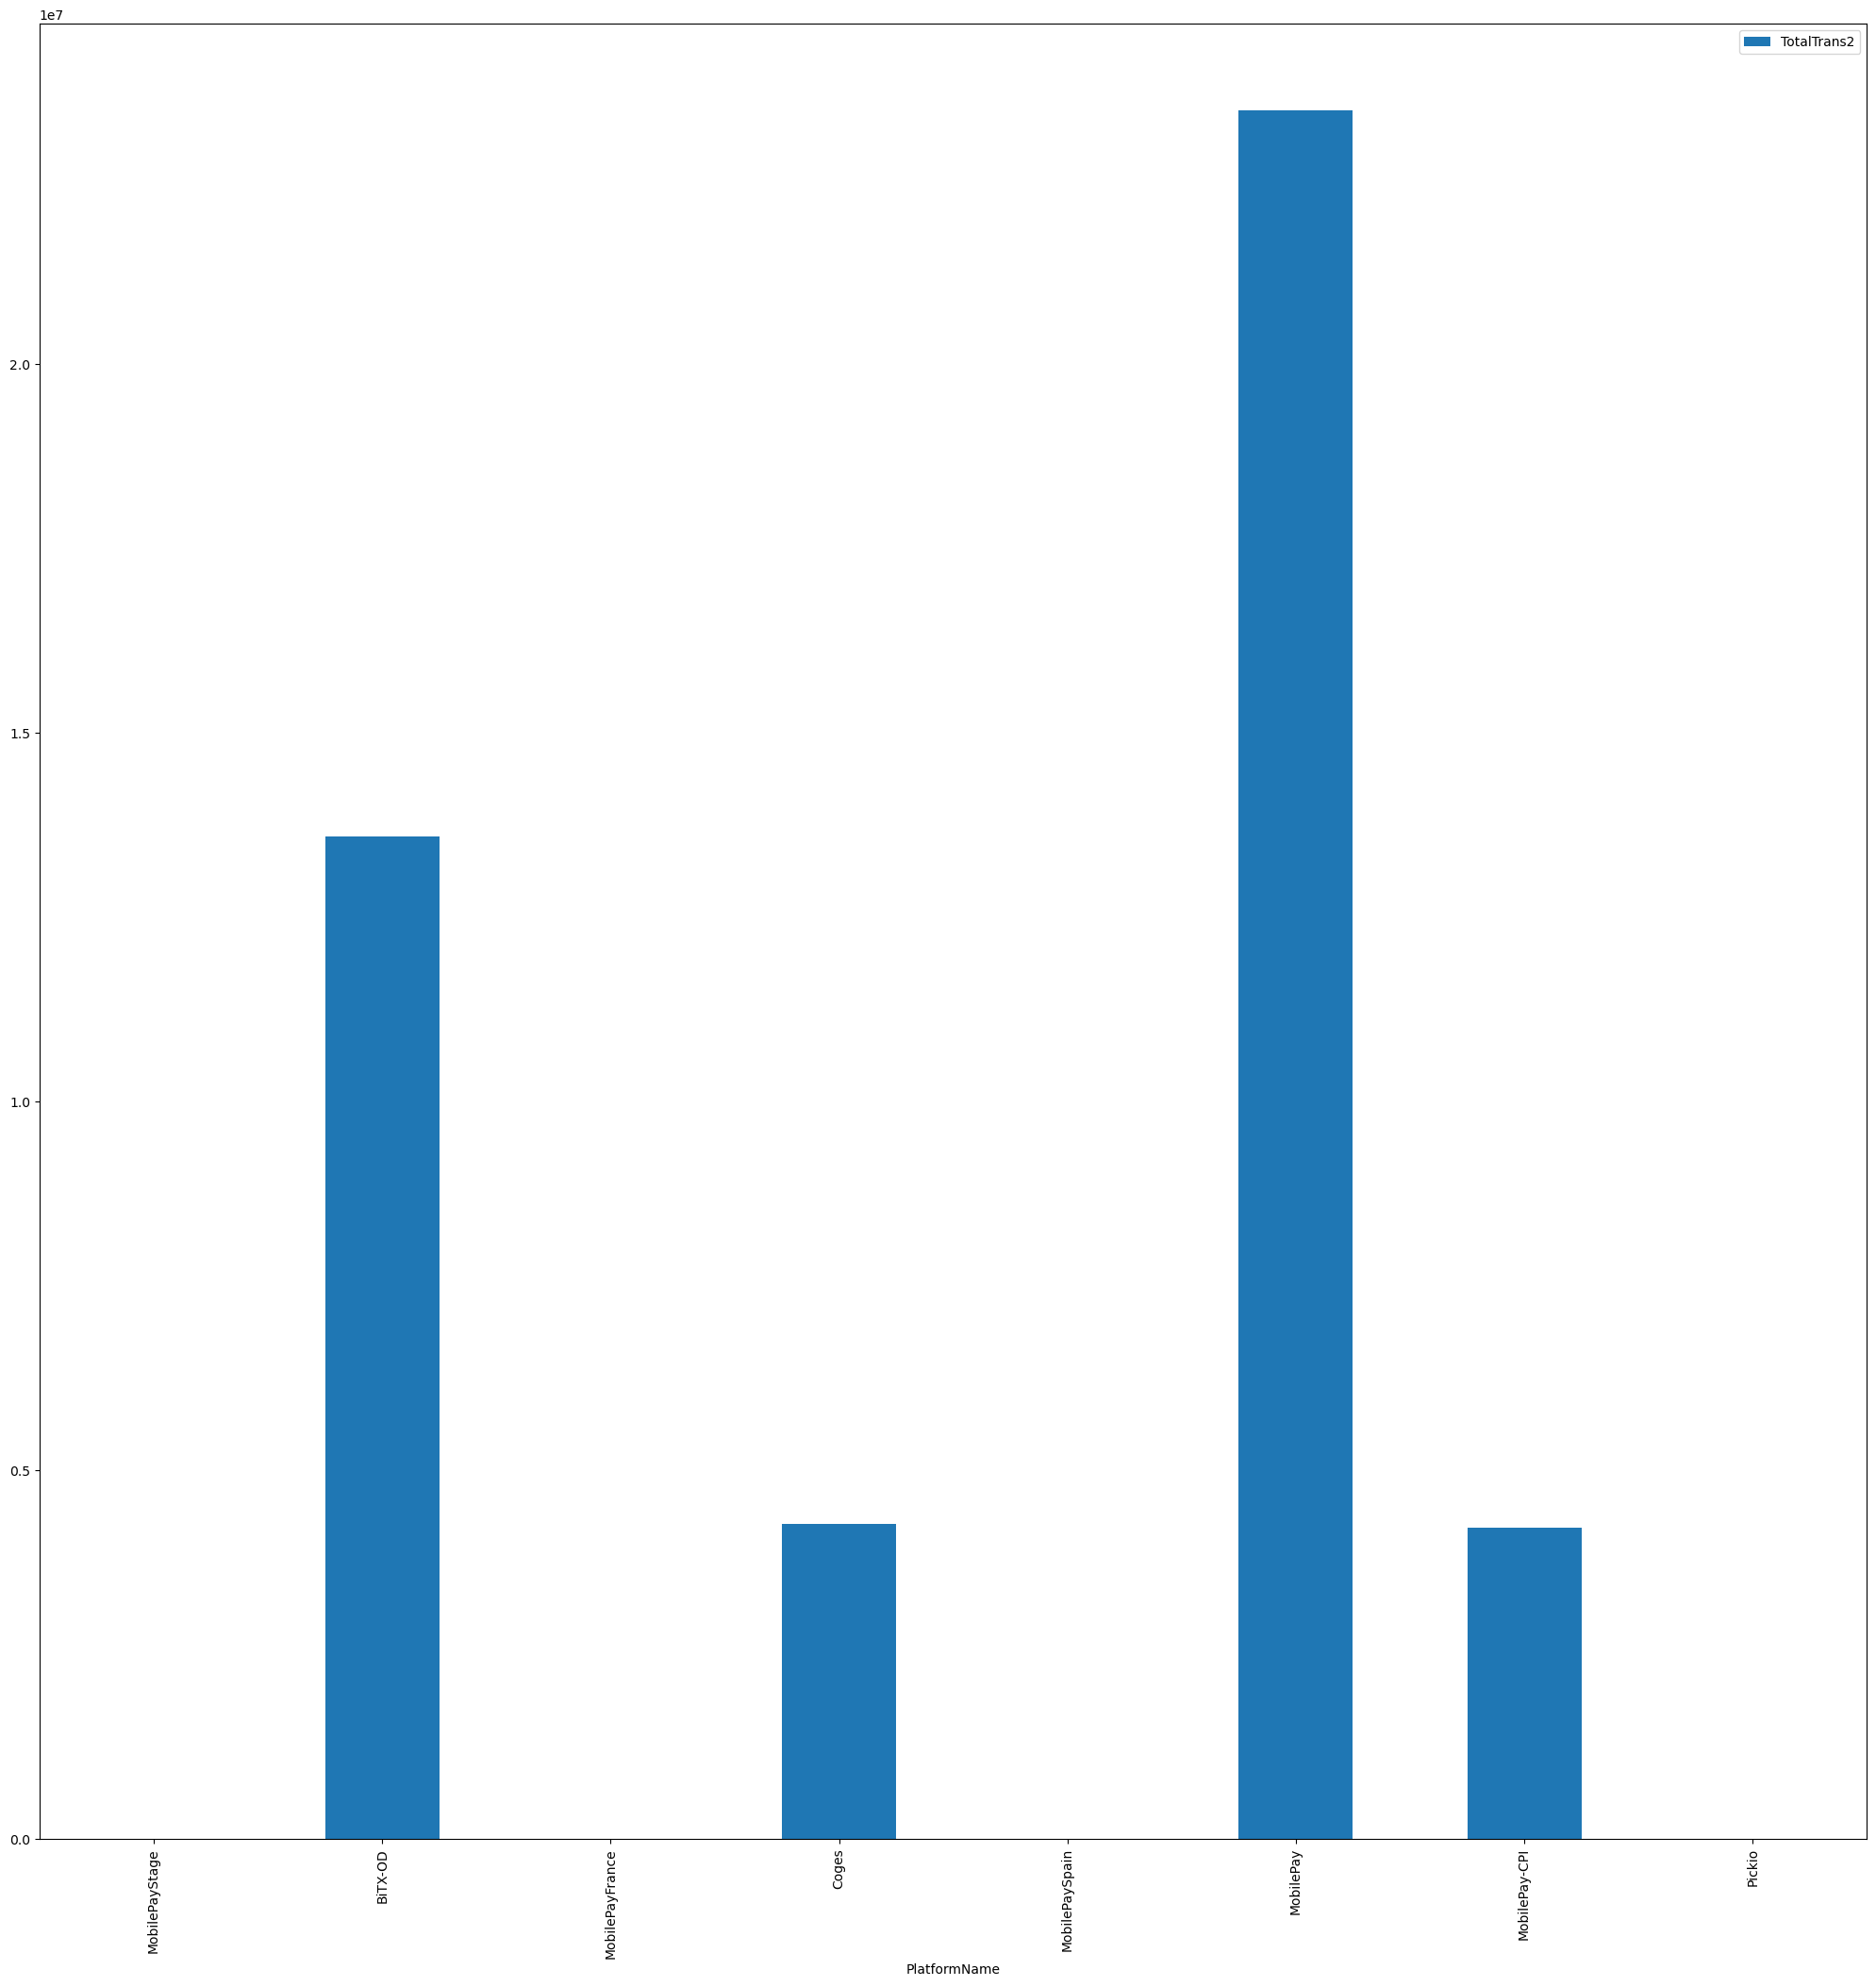

In [17]:
df_coffee4.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalTrans2",
  figsize=(25, 25)
  )

<Axes: xlabel='PlatformName'>

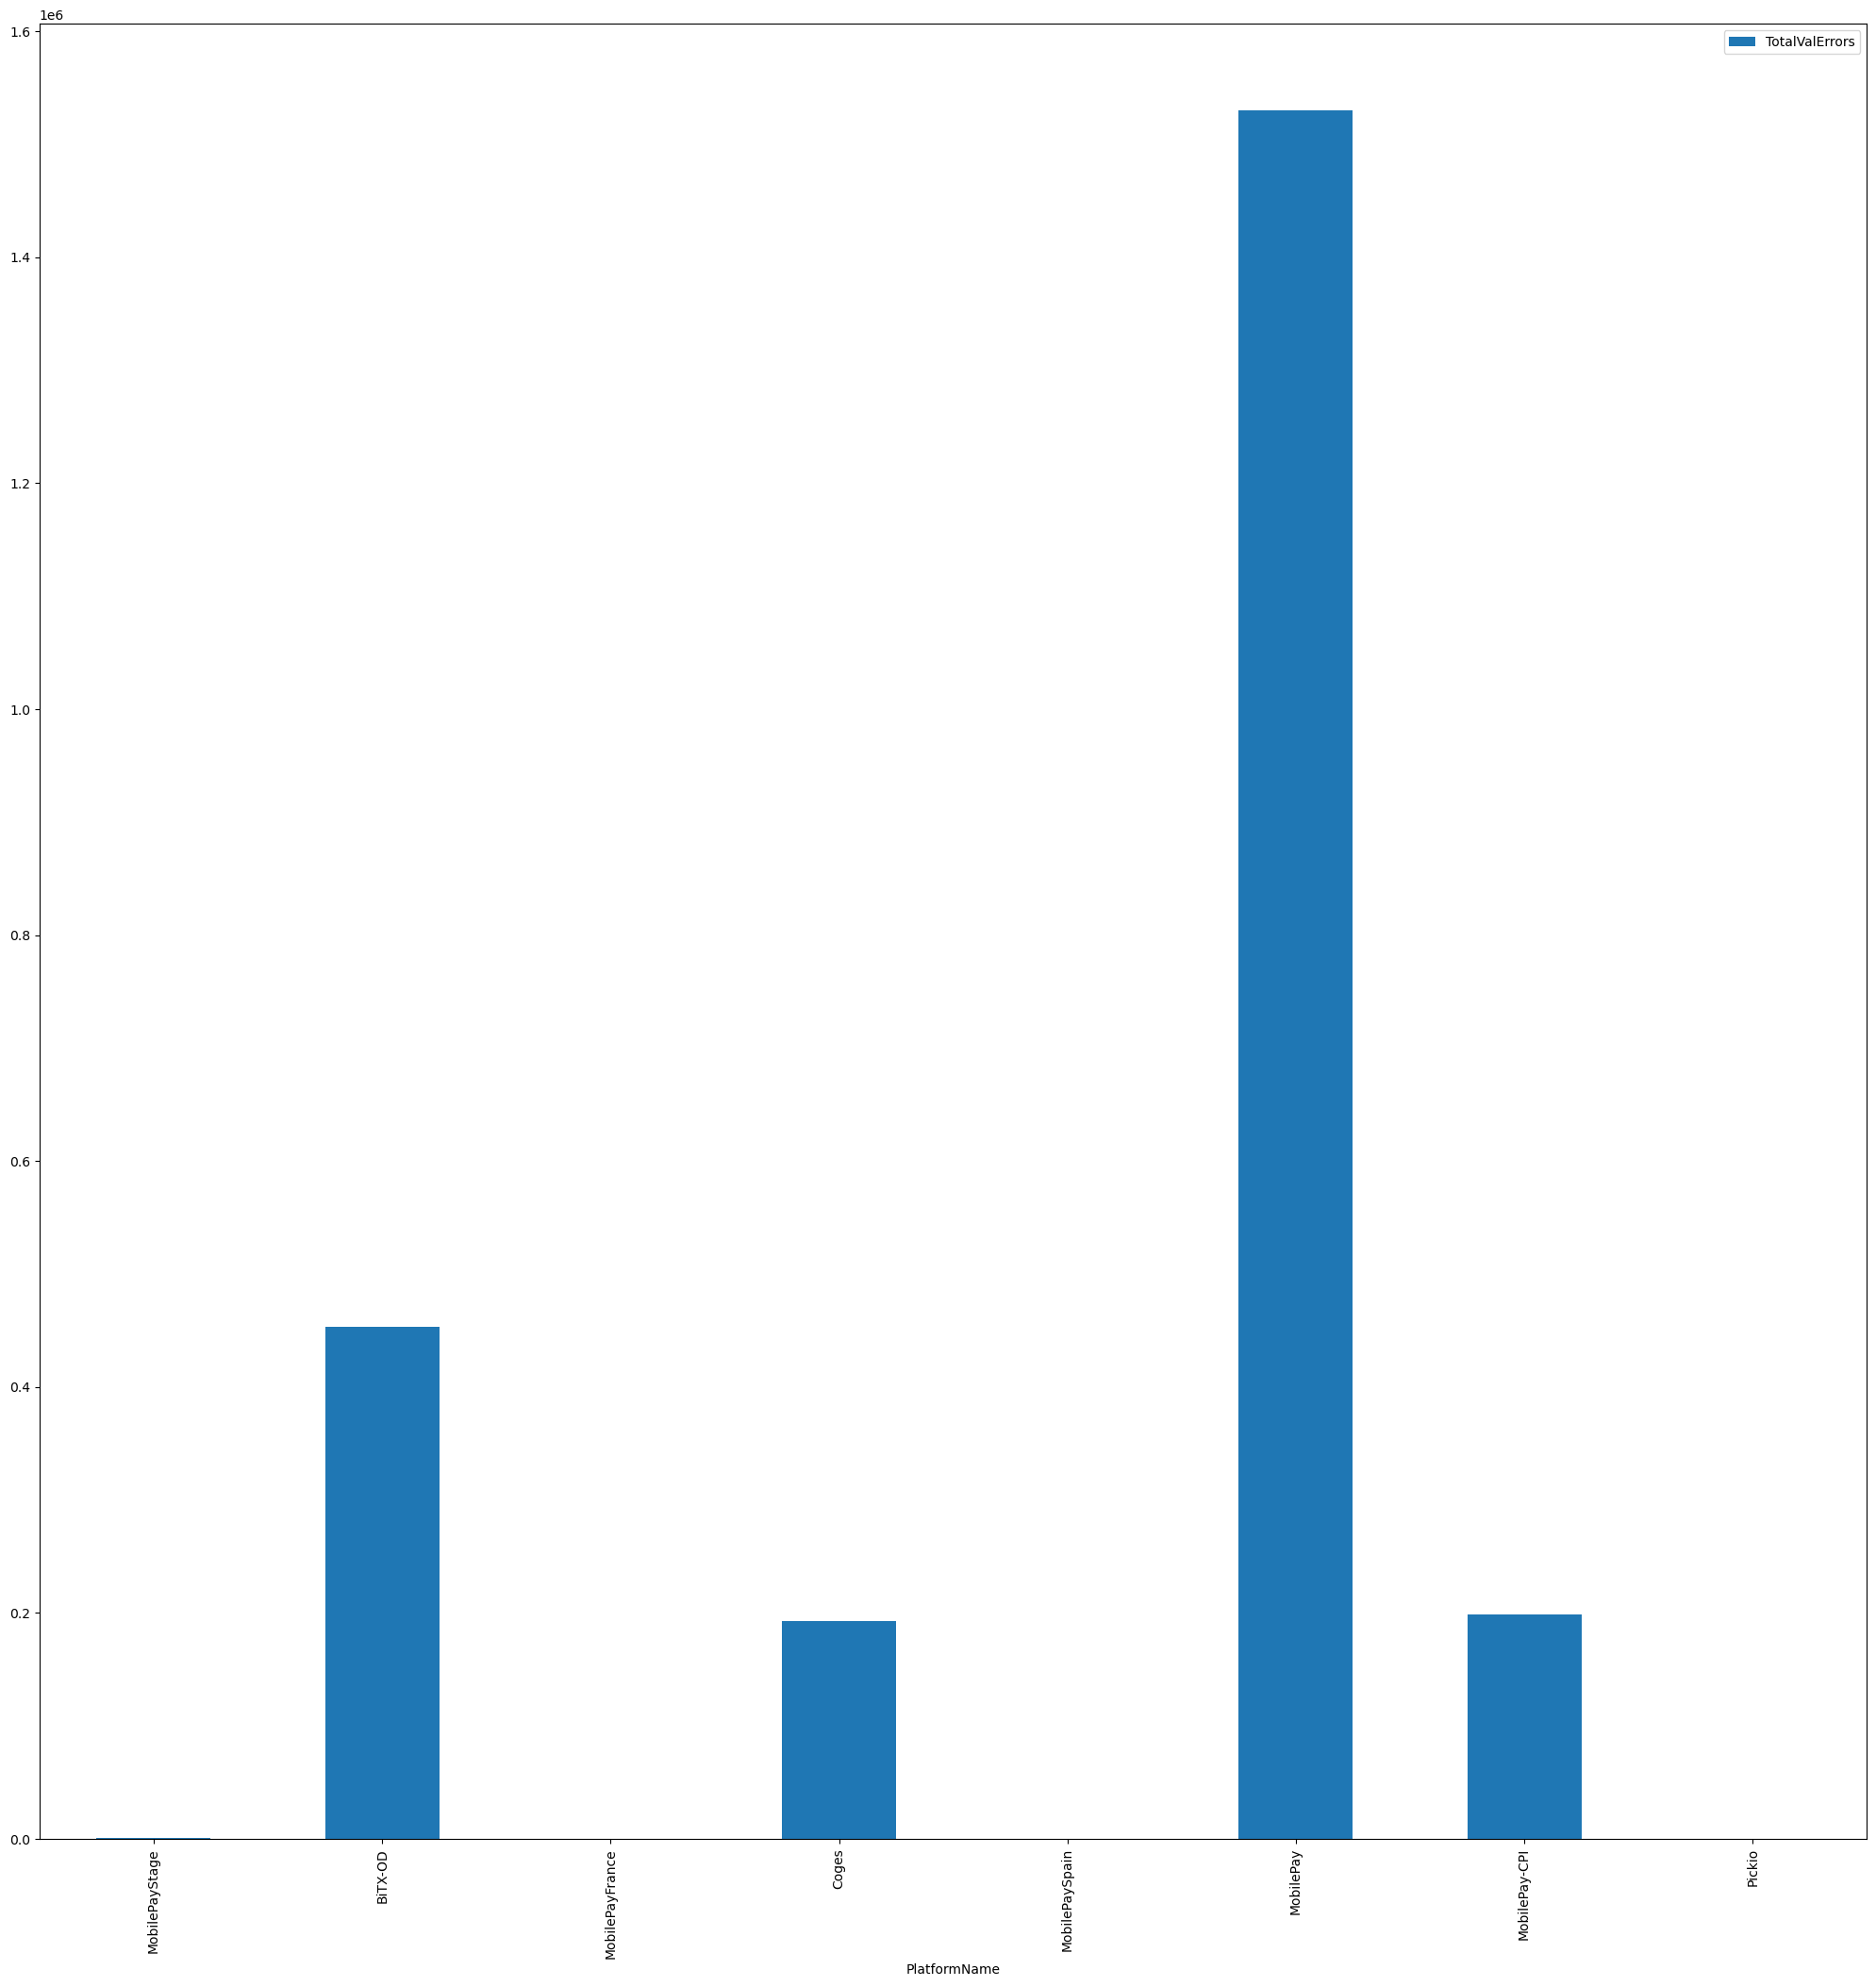

In [18]:
df_coffee4.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalValErrors",
  figsize=(25, 25)
  )

<Axes: xlabel='PlatformName'>

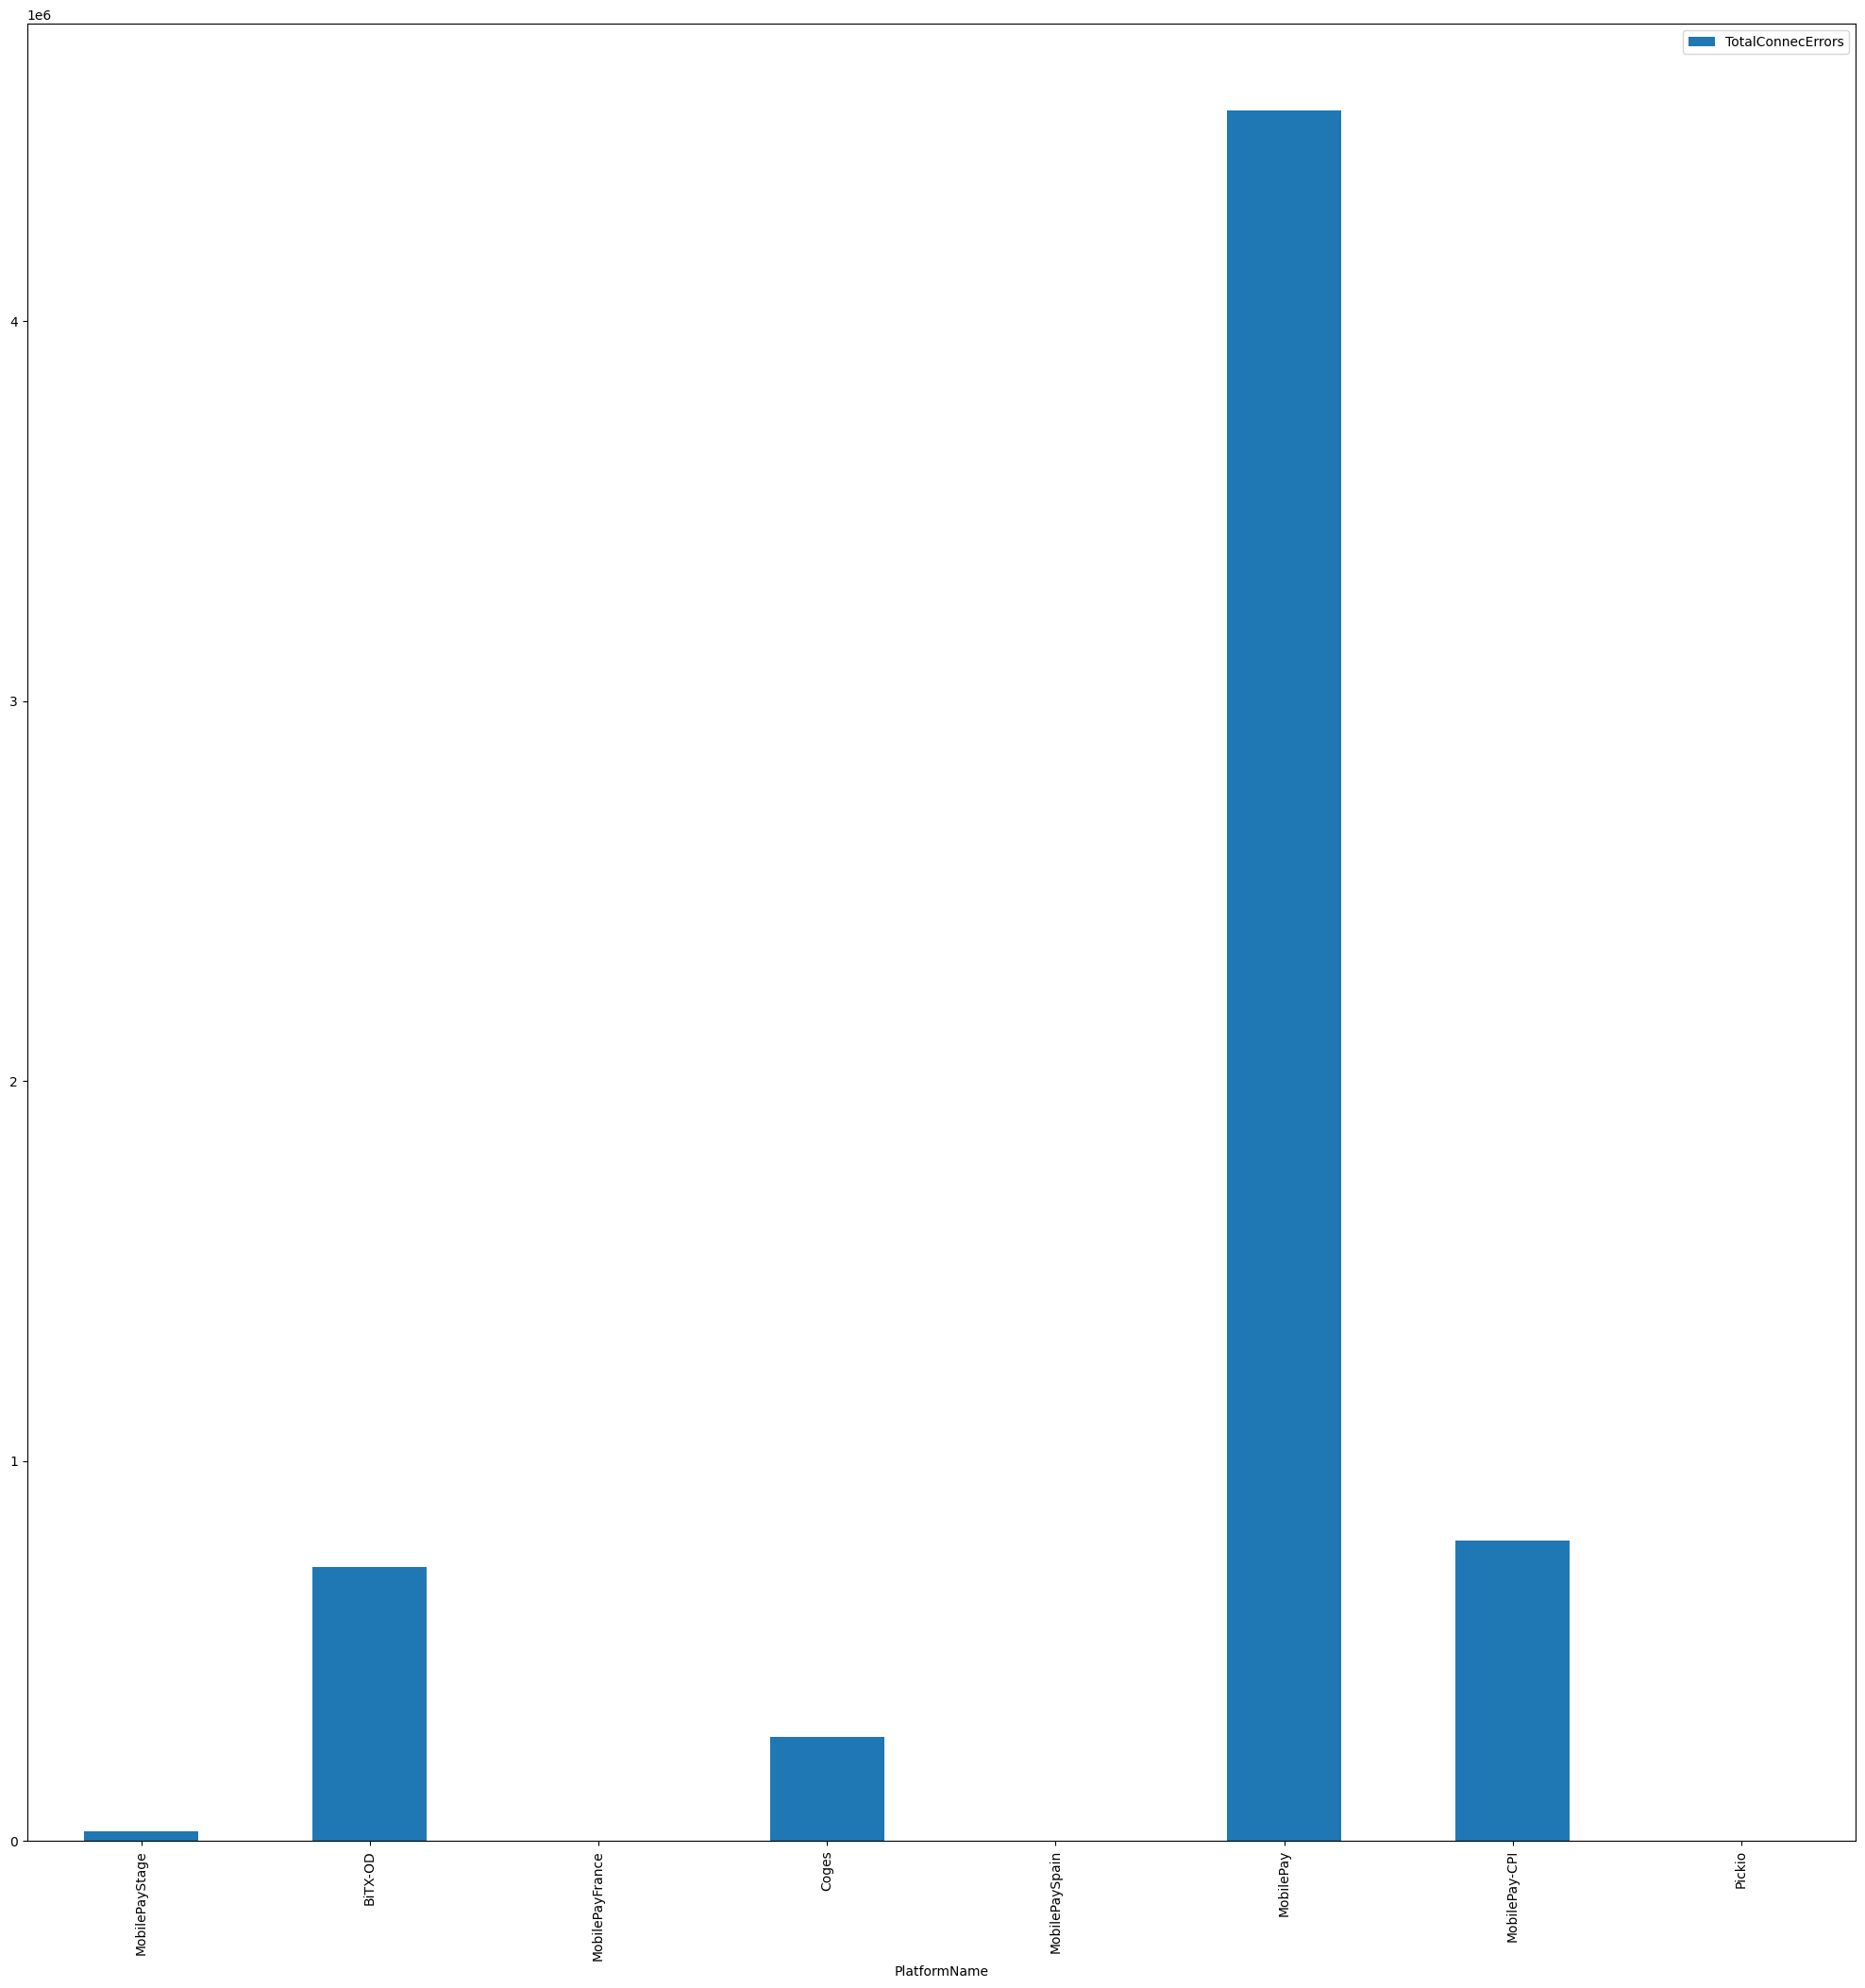

In [19]:
df_coffee4.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalConnecErrors",
  figsize=(25, 25)
  )

<Axes: xlabel='PlatformName'>

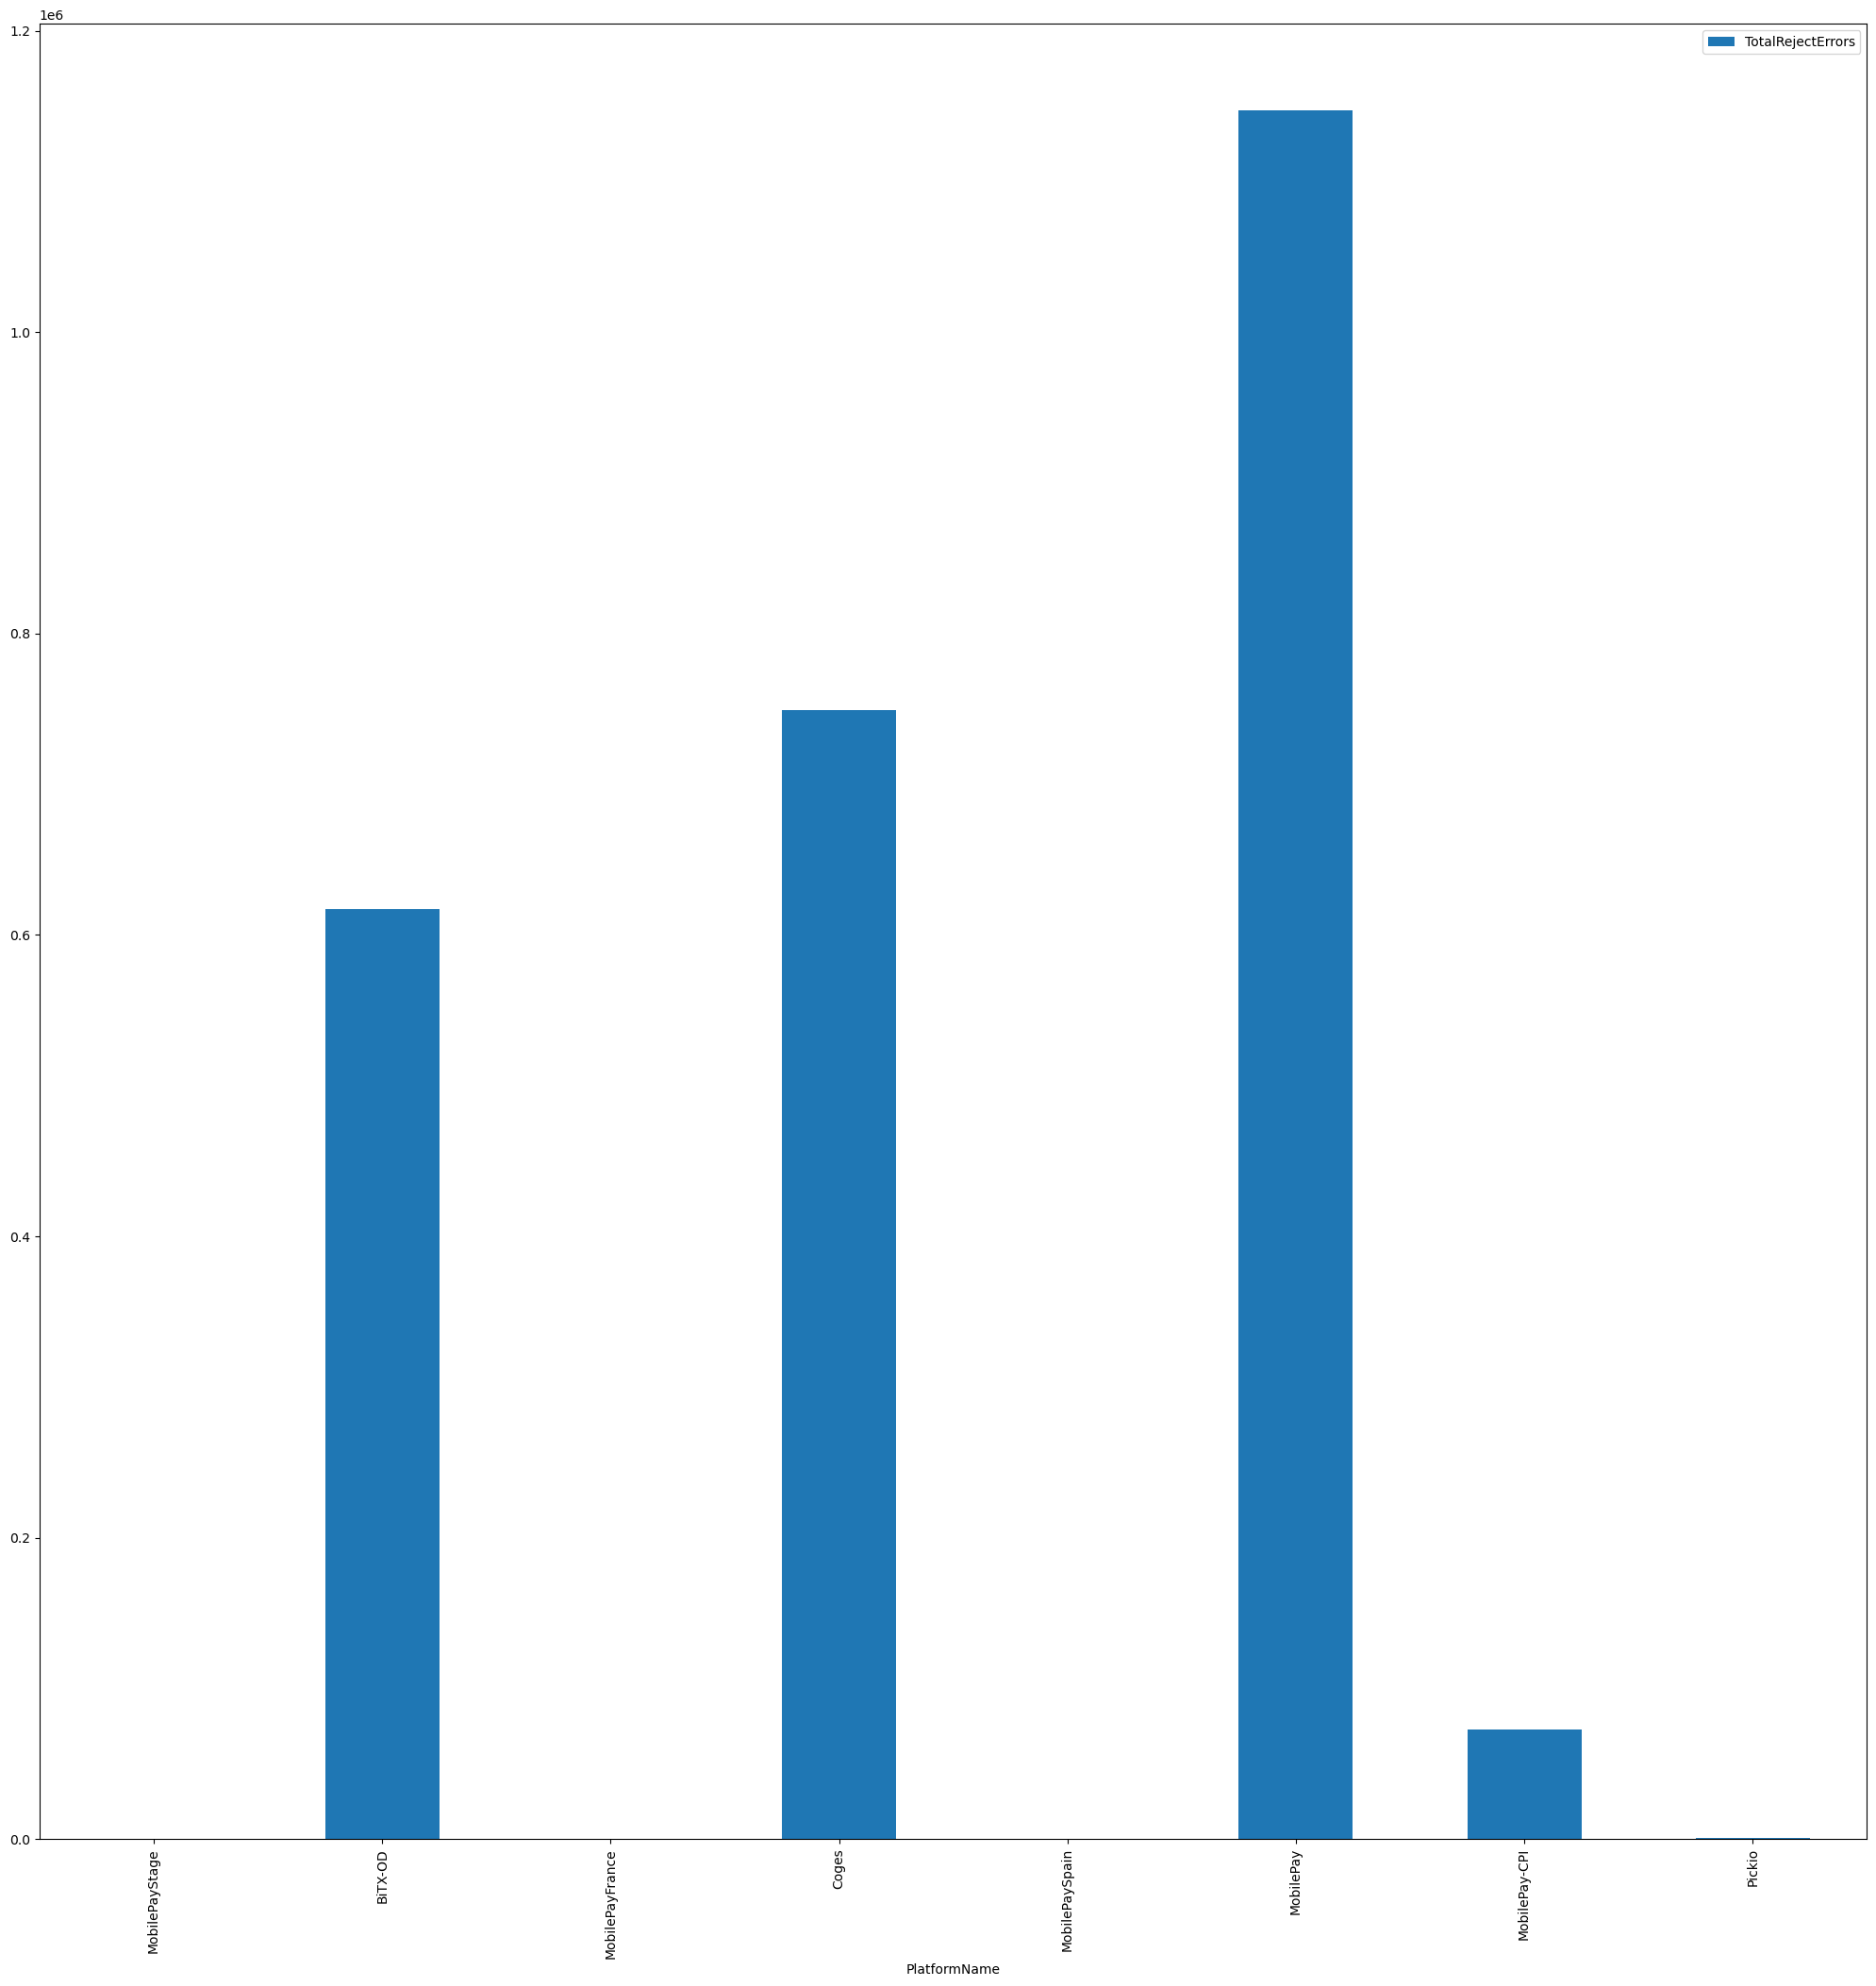

In [20]:
df_coffee4.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalRejectErrors",
  figsize=(25, 25)
  )